# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [ ]:
# Your code here
import pandas as pd
data=pd.read_csv("auto-mpg.csv")
data.head(), data.shape


(    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
 0  18.0          8         307.0        130    3504          12.0          70   
 1  15.0          8         350.0        165    3693          11.5          70   
 2  18.0          8         318.0        150    3436          11.0          70   
 3  16.0          8         304.0        150    3433          12.0          70   
 4  17.0          8         302.0        140    3449          10.5          70   
 
    origin                   car name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  ,
 (398, 9))

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Load and clean data
# -----------------------------
df = pd.read_csv("auto-mpg.csv", na_values="?")
df = df.rename(columns={'car name': 'car_name'})
df = df.dropna().reset_index(drop=True)
df["car_name"] = df["car_name"].str.strip()

# -----------------------------
# Feature selection
# -----------------------------
features = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration"
]

X = df[features].values

# -----------------------------
# Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Target car
# -----------------------------
target_car = "toyota corona mark ii"
matches = df[df["car_name"] == target_car]

if matches.empty:
    raise ValueError(f"Car '{target_car}' not found in dataset")

target_index = matches.index[0]
target_vector = X_scaled[target_index]

# -----------------------------
# MSE similarity computation
# -----------------------------
mse_scores = np.mean((X_scaled - target_vector) ** 2, axis=1)

# -----------------------------
# Top 5 most similar cars
# -----------------------------
similar_indices = np.argsort(mse_scores)[1:6]  # exclude itself

top_5 = df.loc[similar_indices, ["car_name"] + features]
top_5["scaled_mse_distance"] = mse_scores[similar_indices]

print(top_5)


                        car_name   mpg  cylinders  displacement  horsepower  \
271                datsun 200-sx  23.9          4         119.0        97.0   
147                  honda civic  24.0          4         120.0        97.0   
56         toyota corona hardtop  24.0          4         113.0        95.0   
21                   audi 100 ls  24.0          4         107.0        90.0   
81   toyouta corona mark ii (sw)  23.0          4         120.0        97.0   

     weight  acceleration  scaled_mse_distance  
271    2405          14.9             0.001500  
147    2489          15.0             0.004369  
56     2278          15.5             0.007535  
21     2430          14.5             0.009636  
81     2506          14.5             0.013589  


In [22]:
import pandas as pd
import numpy as np

# Load CSV correctly
df = pd.read_csv("auto-mpg.csv", na_values="?")
df = df.rename(columns={'car name': 'car_name'})

# Clean
df = df.dropna().reset_index(drop=True)
df["car_name"] = df["car_name"].str.strip()

features = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration"
]

X = df[features].values

target_car = "toyota corona mark ii"

# Safety check
matches = df[df["car_name"] == target_car]
if matches.empty:
    raise ValueError(f"Car '{target_car}' not found in dataset")

target_index = matches.index[0]
target_vector = X[target_index]

# MSE computation
mse_scores = np.mean((X - target_vector) ** 2, axis=1)

# Get top 5 (excluding itself)
similar_indices = np.argsort(mse_scores)[1:6]

top_5 = df.loc[similar_indices, ["car_name"] + features]
top_5["mse_distance"] = mse_scores[similar_indices]

print(top_5)


                      car_name   mpg  cylinders  displacement  horsepower  \
109                 datsun 610  22.0          4         108.0        94.0   
22                    saab 99e  25.0          4         104.0        95.0   
148                     subaru  26.0          4         108.0        93.0   
364  chevrolet cavalier 2-door  34.0          4         112.0        88.0   
79             ford pinto (sw)  22.0          4         122.0        86.0   

     weight  acceleration  mse_distance  
109    2379          16.5     13.541667  
22     2375          17.5     16.208333  
148    2391          15.5     65.708333  
364    2395          18.0    114.666667  
79     2395          16.0    116.000000  


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# Load and clean data
# -----------------------------
df = pd.read_csv("auto-mpg.csv", na_values="?")
df = df.rename(columns={'car name': 'car_name'}) # Rename the column
df = df.dropna().reset_index(drop=True)
df["car_name"] = df["car_name"].str.strip()

# -----------------------------
# Feature selection (RAW)
# -----------------------------
features = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration"
]

X = df[features].values

# -----------------------------
# Target car
# -----------------------------
target_car = "toyota corona mark ii"
matches = df[df["car_name"] == target_car]

if matches.empty:
    raise ValueError(f"Car '{target_car}' not found")

target_index = matches.index[0]
target_vector = X[target_index].reshape(1, -1)

# -----------------------------
# Cosine similarity
# -----------------------------
cos_sim = cosine_similarity(target_vector, X)[0]

# Exclude the target car itself
cos_sim[target_index] = 1.0

# -----------------------------
# Find most orthogonal car
# -----------------------------
most_orthogonal_index = np.argmin(cos_sim)

result = df.loc[most_orthogonal_index, ["car_name"] + features]
result["cosine_similarity"] = cos_sim[most_orthogonal_index]

print("Most orthogonal (unique) car to Toyota Corona Mark II (no scaling):")
print(result)


Most orthogonal (unique) car to Toyota Corona Mark II (no scaling):
car_name             buick estate wagon (sw)
mpg                                     14.0
cylinders                                  8
displacement                           455.0
horsepower                             225.0
weight                                  3086
acceleration                            10.0
cosine_similarity                   0.994608
Name: 13, dtype: object


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

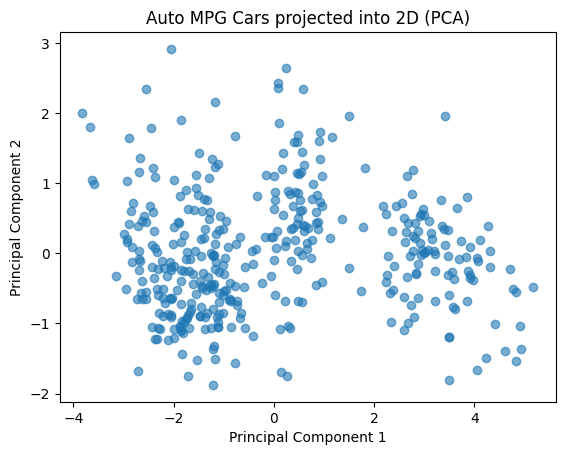

In [57]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# Load and clean data
# -----------------------------
df = pd.read_csv("auto-mpg.csv", na_values="?")
df = df.rename(columns={'car name': 'car_name'})
df = df.dropna().reset_index(drop=True)
df["car_name"] = df["car_name"].str.strip()

# -----------------------------
# Feature selection
# -----------------------------
features = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration"
]

X = df[features].values

# -----------------------------
# Scale features (important for PCA)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# PCA to 2D
# -----------------------------
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Scatter plot
# -----------------------------
plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Auto MPG Cars projected into 2D (PCA)")

plt.show()

### Question 4
Write a function that returns dot product of two list of numbers

In [52]:
# Your code here
def dot_product(a, b):
    if len(a) != len(b):
        raise ValueError("Lists must have the same length")

    return sum(x * y for x, y in zip(a, b))
a=[1,3]
b=[2,4]
dot_product(a,b)


14

### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [60]:
# Your code here
def your_function_22(a,b):
    if len(a) != len(b):
        raise ValueError("Vectors must have the same length")
    dot_ab = sum(x * y for x, y in zip(a, b))
    dot_bb = sum(y * y for y in b)
    if dot_bb == 0:
        raise ValueError("Cannot project onto the zero vector")
    scale = dot_ab / dot_bb
    return [scale * y for y in b]
a = [3, 4]
b = [1, 0]

print(your_function_22(a,b))


[3.0, 0.0]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [65]:
# Your code here
import math
class Vector:
    def __init__(self, values):
        if not values:
            raise ValueError("Vector cannot be empty")
        self.values = list(values)

    def __add__(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must have the same dimension")
        return Vector(a + b for a, b in zip(self.values, other.values))

    def dot(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must have the same dimension")
        return sum(a * b for a, b in zip(self.values, other.values))

    def magnitude(self):
        return math.sqrt(sum(x * x for x in self.values))

    def __repr__(self):
        return f"Vector({self.values})"
v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])

print(v1 + v2)
print(v1.dot(v2))
print(v1.magnitude())
print(v1)

Vector([5, 7, 9])
32
3.7416573867739413
Vector([1, 2, 3])


In [67]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]

print(v1 + v2)

[1, 2, 3, 4, 5, 6]


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [69]:
# Your code here
import math
def your_function_28(v):
    if not v:
        raise ValueError("Vector cannot be empty")

    l1 = sum(abs(x) for x in v)
    l2 = math.sqrt(sum(x * x for x in v))

    return l1, l2
v = [3, -4, 12]
l1, l2 = your_function_28(v)
print("L1 norm:", l1)
print("L2 norm:", l2)

L1 norm: 19
L2 norm: 13.0
